In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

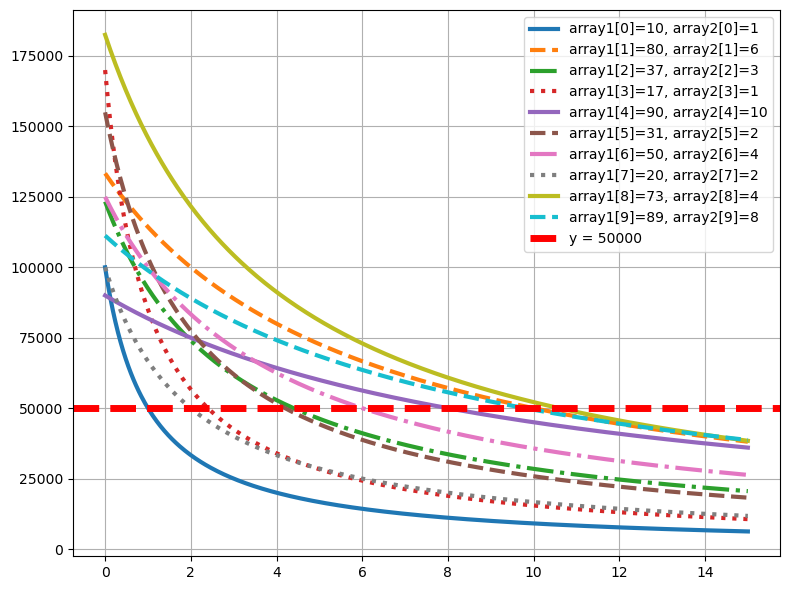

In [2]:
array1 = [10, 80, 37, 17, 90, 31, 50, 20, 73, 89]
array2 = [1, 6, 3, 1, 10, 2, 4, 2, 4, 8]

x = np.linspace(0, 15, 500)

line_styles = ['-', '--', '-.', ':']

plt.figure(figsize=(8, 6))
for i in range(len(array1)):
    y = 10000 * array1[i] / (array2[i] + x)
    style = line_styles[i % len(line_styles)]
    plt.plot(x, y, linestyle=style, linewidth=3,
             label=f'array1[{i}]={array1[i]}, array2[{i}]={array2[i]}')

plt.axhline(y=50000, color='red', linestyle='--', linewidth=5, label='y = 50000')

plt.legend(fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
dist = pd.read_csv("dist.csv")
dist.drop(dist.columns[2], axis=1, inplace=True)
dist.drop(dist.columns[3], axis=1, inplace=True)
dist["Initial Multiplier"] = dist["Multiplier"]/dist["Hunters"]
dist["Final Real Multiplier"] = dist["Multiplier"]/(dist["Hunters"]+dist["Percent of Expeditions"])

In [4]:
total = dist["Percent of Expeditions"].sum()
total

97.21505062380001

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


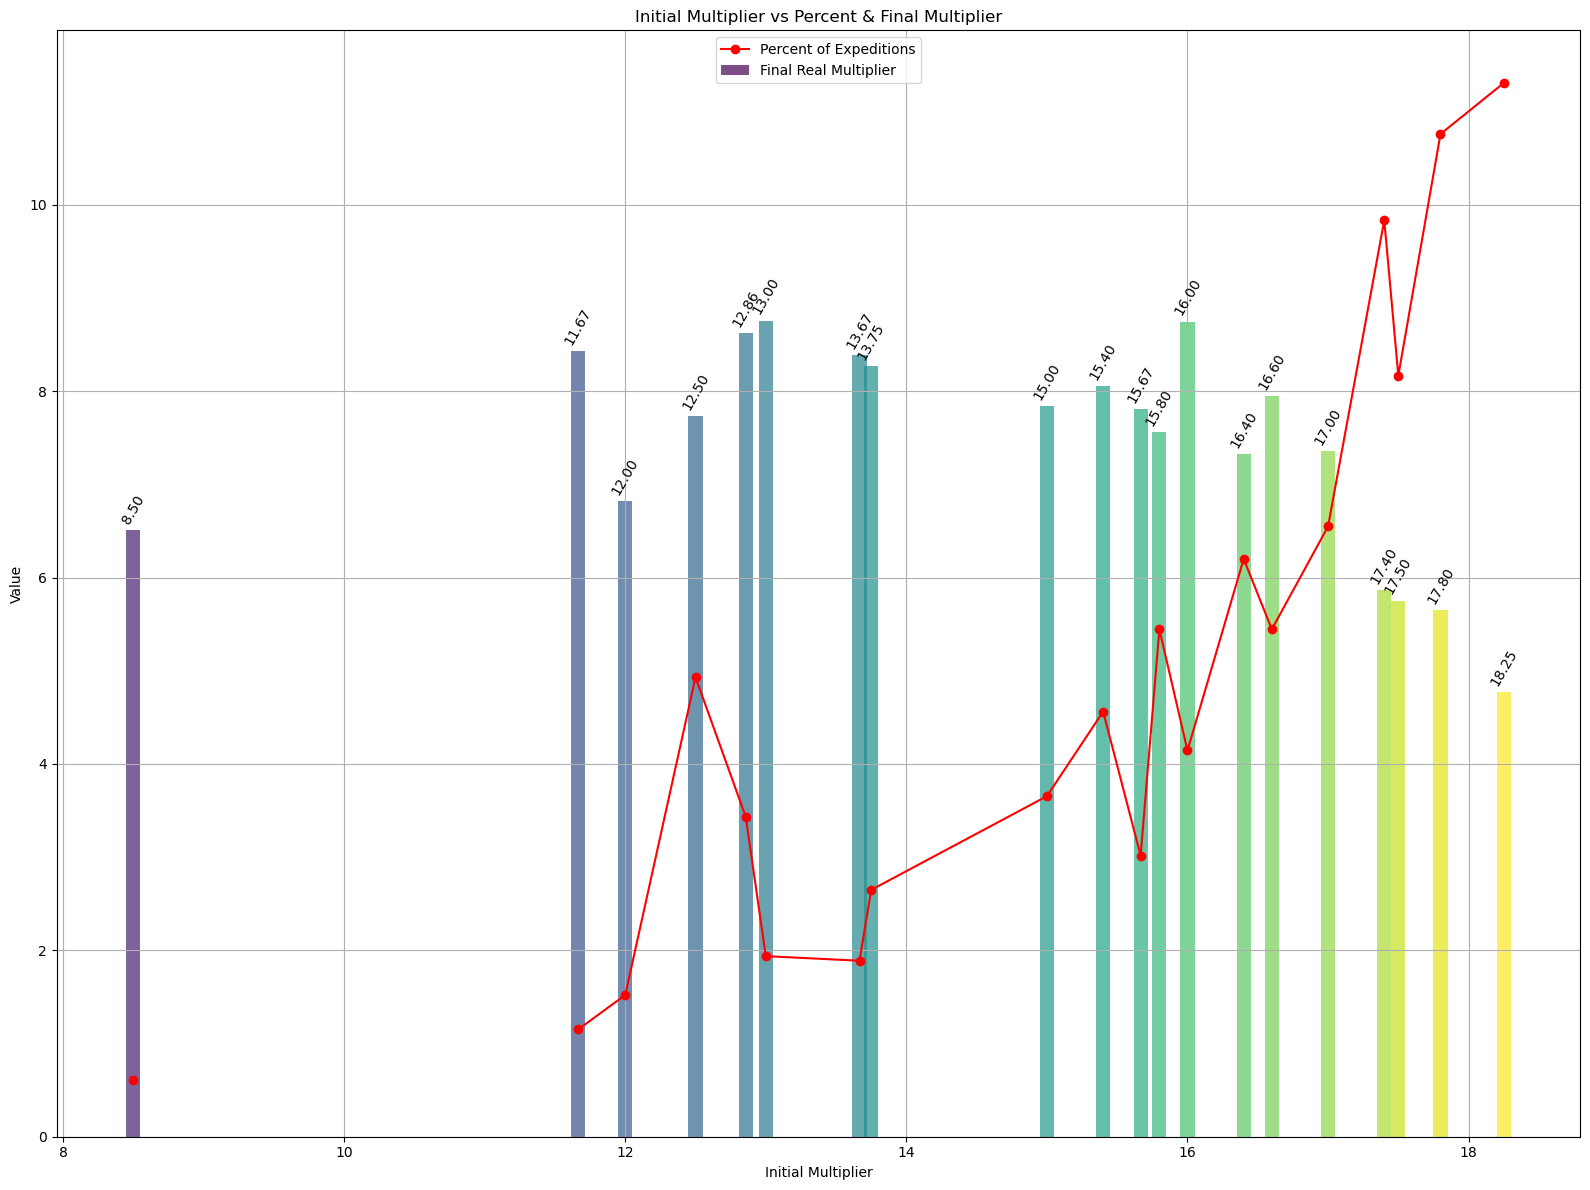

In [5]:
dist_sorted = dist.sort_values("Initial Multiplier")
plt.figure(figsize=(16, 12))

num_bars = len(dist_sorted)
colors = cm.viridis(np.linspace(0, 1, num_bars))

bars = plt.bar(dist_sorted["Initial Multiplier"], dist_sorted["Final Real Multiplier"], 
               width=0.1, color=colors, alpha=0.7, label="Final Real Multiplier")

for bar, x_val in zip(bars, dist_sorted["Initial Multiplier"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.04,
             f'{x_val:.2f}', ha='center', va='bottom', fontsize=10, rotation=60)

plt.plot(dist_sorted["Initial Multiplier"], dist_sorted["Percent of Expeditions"], 
         marker='o', linestyle='-', color='red', label="Percent of Expeditions")

plt.xlabel("Initial Multiplier")
plt.ylabel("Value")
plt.title("Initial Multiplier vs Percent & Final Multiplier")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
df_arrays = pd.DataFrame({
    'Multipler': array1,
    'Participants': array2,
    'Initial Multiplier': np.array(array1) / np.array(array2)
})
df_arrays.sort_values("Initial Multiplier")

,Multipler,Participants,Initial Multiplier
4,90,10,9.000000
0,10,1,10.000000
7,20,2,10.000000
9,89,8,11.125000
2,37,3,12.333333
6,50,4,12.500000
1,80,6,13.333333
5,31,2,15.500000
3,17,1,17.000000
8,73,4,18.250000


In [6]:
dist

,Multiplier,Percent of Expeditions,Hunters,Initial Multiplier,Final Real Multiplier
0,100,4.930096,8,12.500000,7.733895
1,90,3.433897,7,12.857143,8.625732
2,89,10.760000,5,17.800000,5.647208
3,87,9.835664,5,17.400000,5.864247
4,85,6.548933,5,17.000000,7.359987
5,83,5.445180,5,16.600000,7.946249
6,82,6.200000,5,16.400000,7.321429
7,80,4.145205,5,16.000000,8.747754
8,79,5.445180,5,15.800000,7.563297
9,77,4.562178,5,15.400000,8.052559


Shape of df_dist: (25, 5)
Initial multiplier valid values count: 4
Final real multiplier valid values count: 4


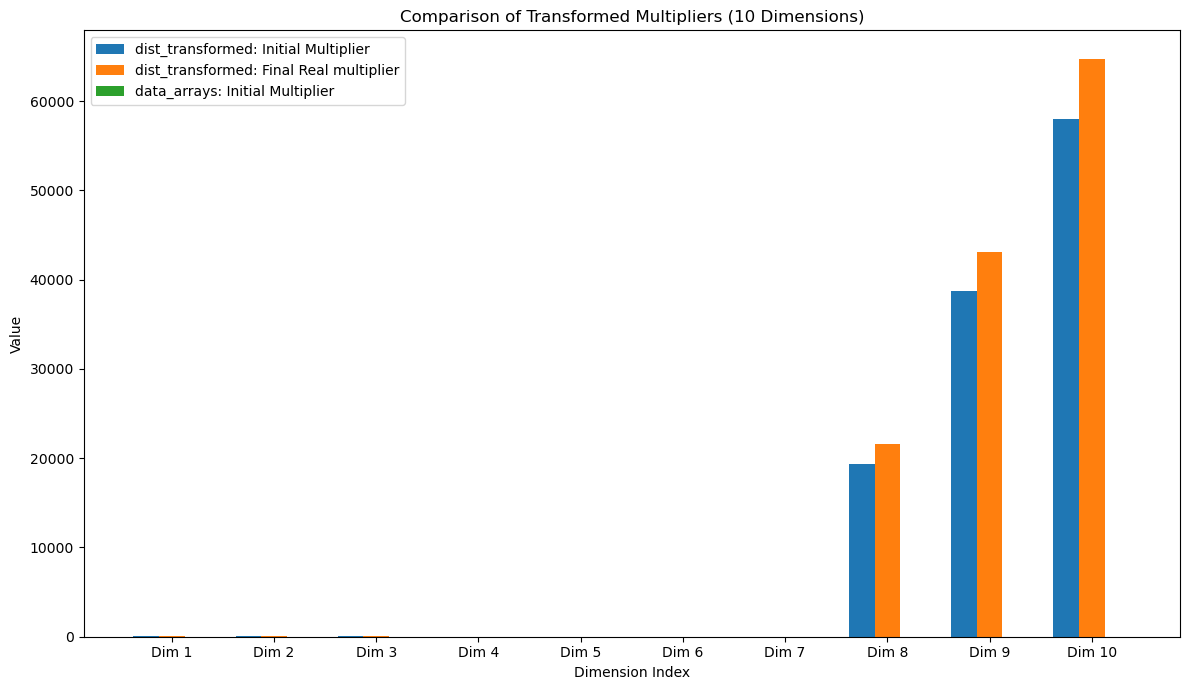

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Load the CSV and remove NaNs
# -------------------------------

# Load the CSV file; assume it has two rows:
#   Row0: Initial Multiplier
#   Row1: Final Real multiplier
df_dist = pd.read_csv('dist.csv')
print("Shape of df_dist:", df_dist.shape)

# Depending on how your CSV is structured (i.e. if each row contains a series with potential NaNs)
# we remove the NaNs from each multiplier series.
# Here we assume that each row is a multiplier series.
initial_series = df_dist.iloc[0].dropna().to_numpy()
final_series = df_dist.iloc[1].dropna().to_numpy()

print("Initial multiplier valid values count:", len(initial_series))
print("Final real multiplier valid values count:", len(final_series))

# Optionally, check if the count is as expected (should be 19)
if len(initial_series) != 19 or len(final_series) != 19:
    print("Warning: The number of non-NaN values is not 19 as expected.")

# -------------------------------
# Step 2: Interpolate each series from 19 dimensions to 10 dimensions
# -------------------------------

# Define the "old" positions. They span [0, 1] with as many points as the valid (non-NaN) values.
x_old_initial = np.linspace(0, 1, num=len(initial_series))
x_old_final   = np.linspace(0, 1, num=len(final_series))
# Define the "new" positions for the 10 dimensions.
x_new = np.linspace(0, 1, num=10)

# Interpolate the valid values into 10 values.
initial_transformed = np.interp(x_new, x_old_initial, initial_series)
final_transformed   = np.interp(x_new, x_old_final, final_series)

# -------------------------------
# Step 3: Load (or simulate) data_arrays and extract the 'Initial Multiplier'
# -------------------------------

# If you already have data_arrays loaded (e.g., from another CSV), then use that.
# For demonstration we simulate data_arrays as a DataFrame with one row and 10 columns.
data_arrays = pd.DataFrame({
    'Initial Multiplier': np.random.rand(10)
})
data_initial = data_arrays['Initial Multiplier'].to_numpy()

# -------------------------------
# Step 4: Plot the three 10-dimensional arrays as a grouped bar chart
# -------------------------------

indices = np.arange(10)         # 10 dimensions -> 10 bars
bar_width = 0.25                # width for each bar

fig, ax = plt.subplots(figsize=(12, 7))

# Plot dist_transformed: initial and final multipliers side by side
ax.bar(indices - bar_width, initial_transformed, bar_width, label='dist_transformed: Initial Multiplier')
ax.bar(indices, final_transformed, bar_width, label='dist_transformed: Final Real multiplier')
# Plot data_arrays initial multiplier next to the others
ax.bar(indices + bar_width, data_initial, bar_width, label='data_arrays: Initial Multiplier')

# Label the x-axis and add titles/legend
ax.set_xticks(indices)
ax.set_xticklabels([f'Dim {i+1}' for i in range(10)])
ax.set_xlabel('Dimension Index')
ax.set_ylabel('Value')
ax.set_title('Comparison of Transformed Multipliers (10 Dimensions)')
ax.legend()

plt.tight_layout()
plt.show()
